In [44]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import r2_score
import sklearn
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import max_error
import forecasting_metrics as metrics

#Ruta de acceso a los modelos generados con k-fold y TimeseriesSplit
ruta = 'modelos/'


# Obtencion de resultados sobre predicciones de modelos entrenados para PM2.5


***********************************************************
**************** Analisis de test *****************
***********************************************************

['PM2_5 dbLF', 'R2', 0.8185344168850455]
['PM2_5 dbLF', 'MSE', 869.2754831833073]
['PM2_5 dbLF', 'RMSE', 29.483478139176647]
['PM2_5 dbLF', 'MASE', 1.042589389587169]

 ************************************* 



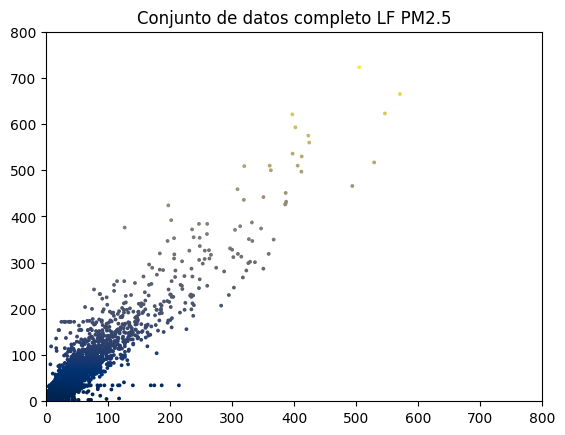

['PM2_5 dbUCM', 'R2', 0.8836363849358032]
['PM2_5 dbUCM', 'MSE', 139.50399720482548]
['PM2_5 dbUCM', 'RMSE', 11.811181024979064]
['PM2_5 dbUCM', 'MASE', 0.8082844991845756]

 ************************************* 



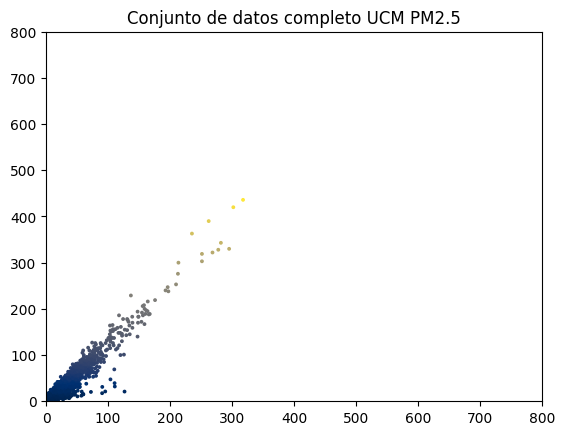

['PM2_5 dbUTAL', 'R2', 0.9187210348184105]
['PM2_5 dbUTAL', 'MSE', 106.28989137865376]
['PM2_5 dbUTAL', 'RMSE', 10.309698898544697]
['PM2_5 dbUTAL', 'MASE', 0.6531758031714]

 ************************************* 



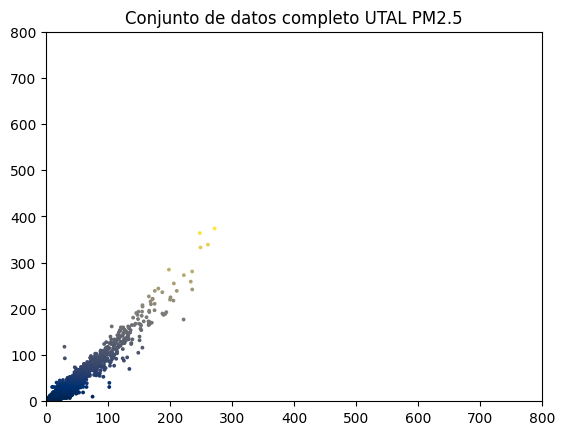

['PM2_5 dfLF', 'R2', 0.8337104189397646]
['PM2_5 dfLF', 'MSE', 796.5778052409845]
['PM2_5 dfLF', 'RMSE', 28.223709983646454]
['PM2_5 dfLF', 'MASE', 0.9872017674280972]

 ************************************* 



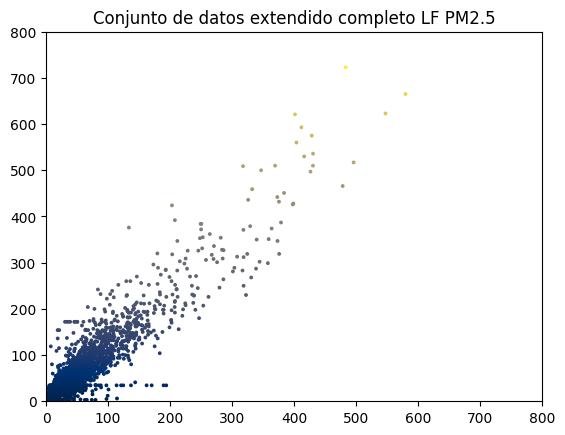

['PM2_5 dfUCM', 'R2', 0.9332344493766174]
['PM2_5 dfUCM', 'MSE', 80.04272798163335]
['PM2_5 dfUCM', 'RMSE', 8.946660157937897]
['PM2_5 dfUCM', 'MASE', 0.6527470729653109]

 ************************************* 



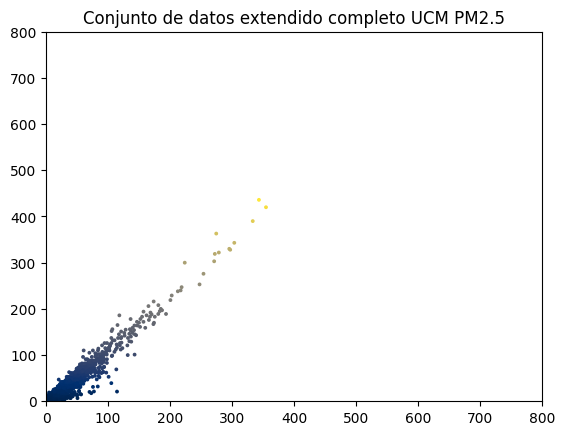

['PM2_5 dfUTAL', 'R2', 0.9243170014292887]
['PM2_5 dfUTAL', 'MSE', 98.97195023730247]
['PM2_5 dfUTAL', 'RMSE', 9.948464717598513]
['PM2_5 dfUTAL', 'MASE', 0.7008449917655752]

 ************************************* 



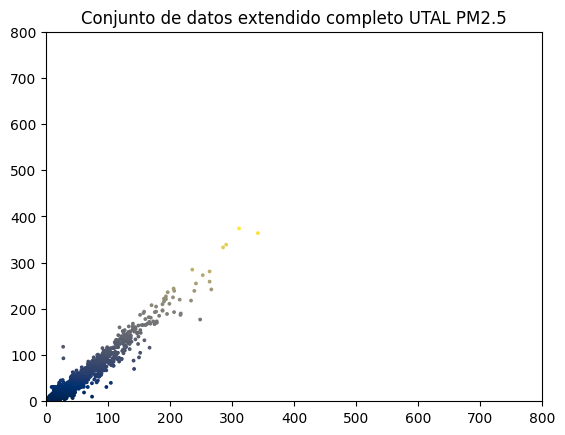

['PM2_5 dbaLF', 'R2', 0.8700658888453926]
['PM2_5 dbaLF', 'MSE', 1054.839446195523]
['PM2_5 dbaLF', 'RMSE', 32.47829192238291]
['PM2_5 dbaLF', 'MASE', 0.5555716652539902]

 ************************************* 



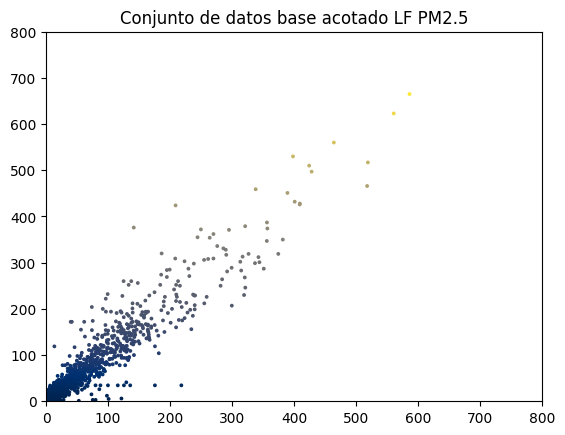

['PM2_5 dbaUCM', 'R2', 0.9282882306410953]
['PM2_5 dbaUCM', 'MSE', 182.4515030443355]
['PM2_5 dbaUCM', 'RMSE', 13.5074610139854]
['PM2_5 dbaUCM', 'MASE', 0.4641908086572039]

 ************************************* 



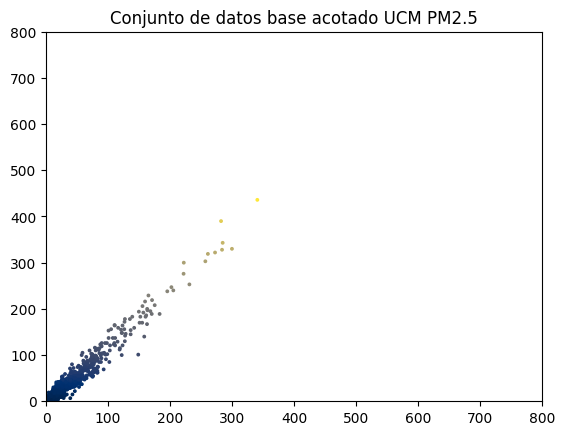

['PM2_5 dbaUTAL', 'R2', 0.9294560762215734]
['PM2_5 dbaUTAL', 'MSE', 178.68610167677468]
['PM2_5 dbaUTAL', 'RMSE', 13.367352081724139]
['PM2_5 dbaUTAL', 'MASE', 0.3894283569555032]

 ************************************* 



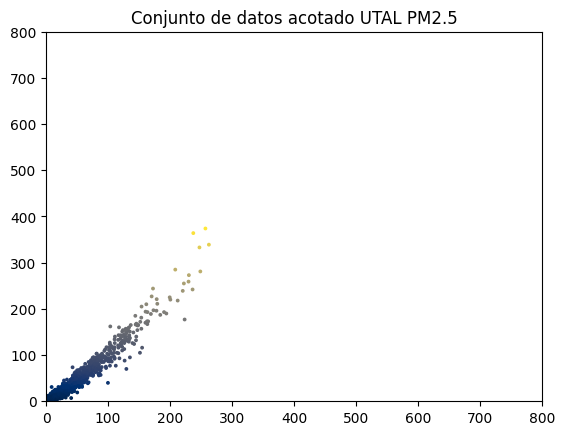

['PM2_5 dfaLF', 'R2', 0.8770645744547112]
['PM2_5 dfaLF', 'MSE', 998.0222671912669]
['PM2_5 dfaLF', 'MAE', 10.883668747468107]
['PM2_5 dfaLF', 'RMSE', 31.591490423708517]
['PM2_5 dfaLF', 'MASE', 0.5423181865353324]

 ************************************* 



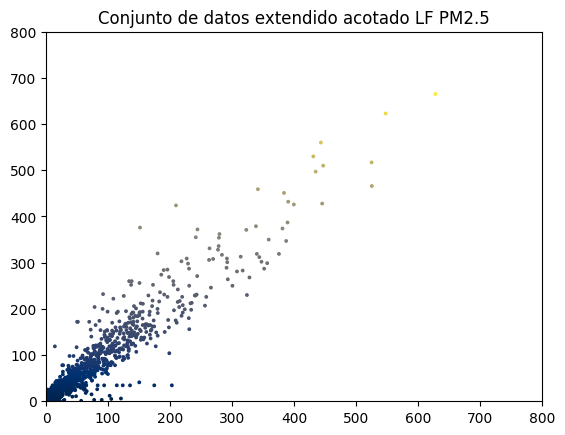

['PM2_5 dfaUCM', 'R2', 0.951281650792895]
['PM2_5 dfaUCM', 'MSE', 123.95086773258365]
['PM2_5 dfaUCM', 'RMSE', 11.13332240315458]
['PM2_5 dfaUCM', 'MASE', 0.41192506985955596]

 ************************************* 



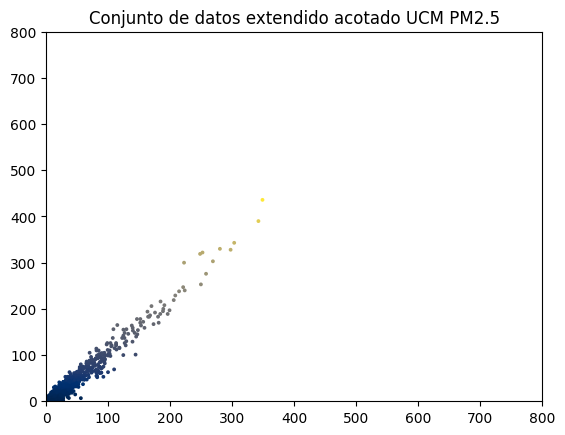

['PM2_5 dfaUTAL', 'R2', 0.9317178724248464]
['PM2_5 dfaUTAL', 'MSE', 172.95702502915873]
['PM2_5 dfaUTAL', 'RMSE', 13.151312673233754]
['PM2_5 dfaUTAL', 'MASE', 0.46078196545322153]

 ************************************* 



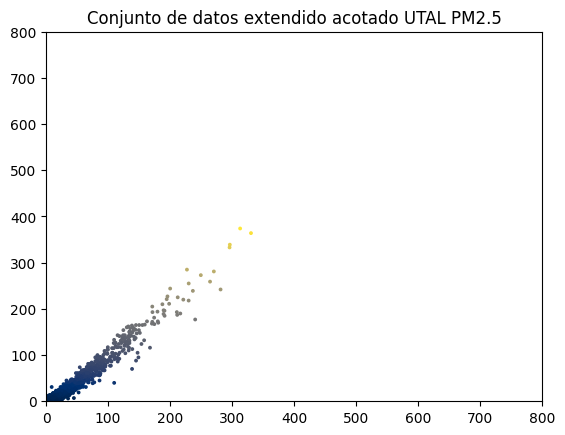

<Figure size 640x480 with 0 Axes>

In [45]:

######################### CALCULO PARA PM2.5 ###################################
print("\n***********************************************************")
print("**************** Analisis de test *****************")
print("***********************************************************\n")
#Atributos
data_basico = ["D_viento","H_relativa","P_atmosferica","Temperatura","V_viento","Pluviometria","PM10"]
data_ampliado = ["D_viento","H_relativa","P_atmosferica",
                        "Temperatura","V_viento","Pluviometria","Media_D_viento",
                        "Media_V_viento","Media_P_atmosferica","Media_Temperatura",
                        "Media_H_relativa","Minimo_Temperatura","Maximo_Temperatura",
                        "Rango_Temperatura","Media_PM2_5","Minimo_PM2_5","Maximo_PM2_5",
                        "Rango_PM2_5","PM10"]

def grafico(lista,target,titulo):
    
    #Grafico
    x = lista
    y = target
    t = y
    plt.scatter(x, y, c=t,s=3,cmap='cividis')
    plt.title(titulo)
    plt.xlim(0,800)
    plt.ylim(0,800)
    plt.show()
    plt.savefig('figura.png')


#Carga del dataset completos la florida, ucm y utal, para PM2_5 imputado por KNN
lf=pd.read_csv('./dataset/lf_pm25_ia.csv')
ucm=pd.read_csv('./dataset/ucm_pm25_ia.csv')
utal=pd.read_csv('./dataset/utal_pm25_ia.csv')

#Carga del dataset acotados la florida, ucm y utal, para PM2_5 imputado por KNN
lf_acot=pd.read_csv('./dataset/lf_pm25a.csv')
ucm_acot=pd.read_csv('./dataset/ucm_pm25a.csv')
utal_acot=pd.read_csv('./dataset/utal_pm25a.csv')

#Se asignan datos superiores a 2018 para test horario completo
test_lf =  lf.loc[lf.FECHA >=180000]
test_ucm =  ucm.loc[ucm.FECHA >=170000]
test_utal =  utal.loc[utal.FECHA >=170000]

test_ucm = test_ucm.loc[test_ucm.FECHA <=180000]
test_utal = test_utal.loc[test_utal.FECHA <=180000]
#Se asignan datos superiores a 2018 para test horario acotado
test_lf_acot =  lf_acot.loc[lf_acot.FECHA >=180000]
test_ucm_acot =  ucm_acot.loc[ucm_acot.FECHA >=170000]
test_utal_acot =  utal_acot.loc[utal_acot.FECHA >=170000]

test_ucm_acot = test_ucm_acot.loc[test_ucm_acot.FECHA <=180000]
test_utal_acot = test_utal_acot.loc[test_utal_acot.FECHA <=180000]

#Se carga el modelo entrenado con un dataset basico para la estacion la florida(dbLF)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dbLF.pkl')
lista = df.predict(test_lf[data_basico].values)
print(["PM2_5 dbLF","R2",r2_score(test_lf["PM2_5"].values, lista)])
print(["PM2_5 dbLF","MSE",mean_squared_error(test_lf["PM2_5"].values, lista)])
#print(["PM2_5 dbLF","MAE",median_absolute_error(test_lf["PM2_5"].values, lista)])
#print(["PM2_5 dbLF","MaxE",max_error(test_lf["PM2_5"].values, lista)])
print(["PM2_5 dbLF","RMSE",metrics.rmse(test_lf["PM2_5"].values, lista)])
print(["PM2_5 dbLF","MASE",metrics.mase(test_lf["PM2_5"].values, lista)])
#print(["PM2_5 dbLF","MAE2",metrics.mae(test_lf["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_lf["PM2_5"].values,"Conjunto de datos completo LF PM2.5")

#Se carga el modelo entrenado con un dataset basico para la estacion ucm (dbUCM)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dbUCM.pkl')
lista = df.predict(test_ucm[data_basico].values)
print(["PM2_5 dbUCM","R2",r2_score(test_ucm["PM2_5"].values, lista)])
print(["PM2_5 dbUCM","MSE",mean_squared_error(test_ucm["PM2_5"].values, lista)])
#print(["PM2_5 dbUCM","MAE",median_absolute_error(test_ucm["PM2_5"].values, lista)])
#print(["PM2_5 dbUCM","MaxE",max_error(test_ucm["PM2_5"].values, lista)])
print(["PM2_5 dbUCM","RMSE",metrics.rmse(test_ucm["PM2_5"].values, lista)])
print(["PM2_5 dbUCM","MASE",metrics.mase(test_ucm["PM2_5"].values, lista)])
#print(["PM2_5 dbUCM","MAE2",metrics.mae(test_ucm["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_ucm["PM2_5"].values,"Conjunto de datos completo UCM PM2.5")

#Se carga el modelo entrenado con un dataset basico para la estacion utal (dbUTAL)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dbUTAL.pkl')
lista = df.predict(test_utal[data_basico].values)
print(["PM2_5 dbUTAL","R2",r2_score(test_utal["PM2_5"].values, lista)])
print(["PM2_5 dbUTAL","MSE",mean_squared_error(test_utal["PM2_5"].values, lista)])
#print(["PM2_5 dbUTAL","MAE",median_absolute_error(test_utal["PM2_5"].values, lista)])
#print(["PM2_5 dbUTAL","MaxE",max_error(test_utal["PM2_5"].values, lista)])
print(["PM2_5 dbUTAL","RMSE",metrics.rmse(test_utal["PM2_5"].values, lista)])
print(["PM2_5 dbUTAL","MASE",metrics.mase(test_utal["PM2_5"].values, lista)])
#print(["PM2_5 dbUTAL","MAE2",metrics.mae(test_utal["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_utal["PM2_5"].values,"Conjunto de datos completo UTAL PM2.5")

#Se carga el modelo entrenado con un dataset ampliado(full) con las 24hrs para la estacion la florida (dfLF)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dfLF.pkl')
lista = df.predict(test_lf[data_ampliado].values)
print(["PM2_5 dfLF","R2",r2_score(test_lf["PM2_5"].values, lista)])
print(["PM2_5 dfLF","MSE",mean_squared_error(test_lf["PM2_5"].values, lista)])
#print(["PM2_5 dfLF","MAE",median_absolute_error(test_lf["PM2_5"].values, lista)])
#print(["PM2_5 dfLF","MaxE",max_error(test_lf["PM2_5"].values, lista)])
print(["PM2_5 dfLF","RMSE",metrics.rmse(test_lf["PM2_5"].values, lista)])
print(["PM2_5 dfLF","MASE",metrics.mase(test_lf["PM2_5"].values, lista)])
#print(["PM2_5 dfLF","MAE2",metrics.mae(test_lf["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_lf["PM2_5"].values,"Conjunto de datos extendido completo LF PM2.5")

#Se carga el modelo entrenado con un dataset ampliado(full) con las 24hrs para la estacion ucm (dfUCM)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dfUCM.pkl')
lista = df.predict(test_ucm[data_ampliado].values)
print(["PM2_5 dfUCM","R2",r2_score(test_ucm["PM2_5"].values, lista)])
print(["PM2_5 dfUCM","MSE",mean_squared_error(test_ucm["PM2_5"].values, lista)])
#print(["PM2_5 dfUCM","MAE",median_absolute_error(test_ucm["PM2_5"].values, lista)])
#print(["PM2_5 dfUCM","MaxE",max_error(test_ucm["PM2_5"].values, lista)])
print(["PM2_5 dfUCM","RMSE",metrics.rmse(test_ucm["PM2_5"].values, lista)])
print(["PM2_5 dfUCM","MASE",metrics.mase(test_ucm["PM2_5"].values, lista)])
#print(["PM2_5 dfUCM","MAE2",metrics.mae(test_ucm["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_ucm["PM2_5"].values,"Conjunto de datos extendido completo UCM PM2.5")

#Se carga el modelo entrenado con un dataset ampliado(full) con las 24hrs para la estacion UTAL (dfUTAL)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dfUTAL.pkl')
lista = df.predict(test_utal[data_ampliado].values)
print(["PM2_5 dfUTAL","R2",r2_score(test_utal["PM2_5"].values, lista)])
print(["PM2_5 dfUTAL","MSE",mean_squared_error(test_utal["PM2_5"].values, lista)])
#print(["PM2_5 dfUTAL","MAE",median_absolute_error(test_utal["PM2_5"].values, lista)])
#print(["PM2_5 dfUTAL","MaxE",max_error(test_utal["PM2_5"].values, lista)])
print(["PM2_5 dfUTAL","RMSE",metrics.rmse(test_utal["PM2_5"].values, lista)])
print(["PM2_5 dfUTAL","MASE",metrics.mase(test_utal["PM2_5"].values, lista)])
#print(["PM2_5 dfUTAL","MAE2",metrics.mae(test_utal["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_utal["PM2_5"].values,"Conjunto de datos extendido completo UTAL PM2.5")

#Se carga el modelo entrenado con un dataset basico ampliado para la estacion la florida (dbaLF)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dbaLF.pkl')
lista = df.predict(test_lf_acot[data_basico].values)
print(["PM2_5 dbaLF","R2",r2_score(test_lf_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaLF","MSE",mean_squared_error(test_lf_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaLF","MAE",median_absolute_error(test_lf_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaLF","MaxE",max_error(test_lf_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaLF","RMSE",metrics.rmse(test_lf_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaLF","MASE",metrics.mase(test_lf_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaLF","MAE2",metrics.mae(test_lf_acot["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_lf_acot["PM2_5"].values,"Conjunto de datos base acotado LF PM2.5")

#Se carga el modelo entrenado con un dataset basico ampliado para la estacion ucm(dbaUCM)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dbaUCM.pkl')
lista = df.predict(test_ucm_acot[data_basico].values)
print(["PM2_5 dbaUCM","R2",r2_score(test_ucm_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaUCM","MSE",mean_squared_error(test_ucm_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaUCM","MAE",median_absolute_error(test_ucm_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaUCM","MaxE",max_error(test_ucm_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaUCM","RMSE",metrics.rmse(test_ucm_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaUCM","MASE",metrics.mase(test_ucm_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaUCM","MAE2",metrics.mae(test_ucm_acot["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_ucm_acot["PM2_5"].values,"Conjunto de datos base acotado UCM PM2.5")

#Se carga el modelo entrenado con un dataset basico ampliado para la estacion uatl (dbaUTAL)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dbaUTAL.pkl')
lista = df.predict(test_utal_acot[data_basico].values)
print(["PM2_5 dbaUTAL","R2",r2_score(test_utal_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaUTAL","MSE",mean_squared_error(test_utal_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaUTAL","MAE",median_absolute_error(test_utal_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaUTAL","MaxE",max_error(test_utal_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaUTAL","RMSE",metrics.rmse(test_utal_acot["PM2_5"].values, lista)])
print(["PM2_5 dbaUTAL","MASE",metrics.mase(test_utal_acot["PM2_5"].values, lista)])
#print(["PM2_5 dbaUTAL","MAE2",metrics.mae(test_utal_acot["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_utal_acot["PM2_5"].values,"Conjunto de datos acotado UTAL PM2.5")

#Se carga el modelo entrenado con un dataset ampliado(full) acotado a 6hrs para la estacion la florida (dfaLF)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dfaLF.pkl')
lista = df.predict(test_lf_acot[data_ampliado].values)
print(["PM2_5 dfaLF","R2",r2_score(test_lf_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaLF","MSE",mean_squared_error(test_lf_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaLF","MAE",median_absolute_error(test_lf_acot["PM2_5"].values, lista)])
#print(["PM2_5 dfaLF","MaxE",max_error(test_lf_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaLF","RMSE",metrics.rmse(test_lf_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaLF","MASE",metrics.mase(test_lf_acot["PM2_5"].values, lista)])
#print(["PM2_5 dfaLF","MAE2",metrics.mae(test_lf_acot["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_lf_acot["PM2_5"].values,"Conjunto de datos extendido acotado LF PM2.5")
pm2_5_lf_o=test_lf_acot["PM2_5"].values
pm2_5_lf_p=lista

#Se carga el modelo entrenado con un dataset ampliado(full) acotado a 6hrs para la estacion ucm (dfaUCM)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dfaUCM.pkl')
lista = df.predict(test_ucm_acot[data_ampliado].values)
print(["PM2_5 dfaUCM","R2",r2_score(test_ucm_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaUCM","MSE",mean_squared_error(test_ucm_acot["PM2_5"].values, lista)])
#print(["PM2_5 dfaUCM","MAE",median_absolute_error(test_ucm_acot["PM2_5"].values, lista)])
#print(["PM2_5 dfaUCM","MaxE",max_error(test_ucm_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaUCM","RMSE",metrics.rmse(test_ucm_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaUCM","MASE",metrics.mase(test_ucm_acot["PM2_5"].values, lista)])
#print(["PM2_5 dfaUCM","MAE2",metrics.mae(test_ucm_acot["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_ucm_acot["PM2_5"].values,"Conjunto de datos extendido acotado UCM PM2.5")
pm2_5_ucm_o=test_ucm_acot["PM2_5"].values
pm2_5_ucm_p=lista

#Se carga el modelo entrenado con un dataset ampliado(full) acotado a 6hrs para la estacion utal (dfaUTAL)
df = joblib.load('./'+ruta+'modelo_entrenadoPM25_dfaUTAL.pkl')
lista = df.predict(test_utal_acot[data_ampliado].values)
print(["PM2_5 dfaUTAL","R2",r2_score(test_utal_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaUTAL","MSE",mean_squared_error(test_utal_acot["PM2_5"].values, lista)])
#print(["PM2_5 dfaUTAL","MAE",median_absolute_error(test_utal_acot["PM2_5"].values, lista)])
#print(["PM2_5 dfaUTAL","MaxE",max_error(test_utal_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaUTAL","RMSE",metrics.rmse(test_utal_acot["PM2_5"].values, lista)])
print(["PM2_5 dfaUTAL","MASE",metrics.mase(test_utal_acot["PM2_5"].values, lista)])
#print(["PM2_5 dfaUTAL","MAE2",metrics.mae(test_utal_acot["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_utal_acot["PM2_5"].values,"Conjunto de datos extendido acotado UTAL PM2.5")
pm2_5_utal_o=test_utal_acot["PM2_5"].values
pm2_5_utal_p=lista


# # Obtencion de resultados sobre predicciones de modelos entrenados para  PM10


***********************************************************
**************** Analisis de test*****************
***********************************************************

['PM10 dbLF', 'R2', 0.7772726733745168]
['PM10 dbLF', 'MSE', 1310.1562686533844]
['PM10 dbLF', 'RMSE', 36.19608084659698]
['PM10 dbLF', 'MASE', 1.1331004403015958]

 ************************************* 



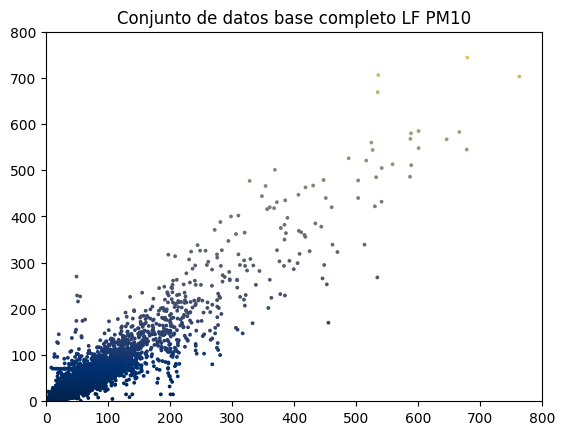

['PM10 dbUCM', 'R2', 0.8044333682964353]
['PM10 dbUCM', 'MSE', 1089.1899725752194]
['PM10 dbUCM', 'RMSE', 33.00287824683204]
['PM10 dbUCM', 'MASE', 1.1305566570382837]

 ************************************* 



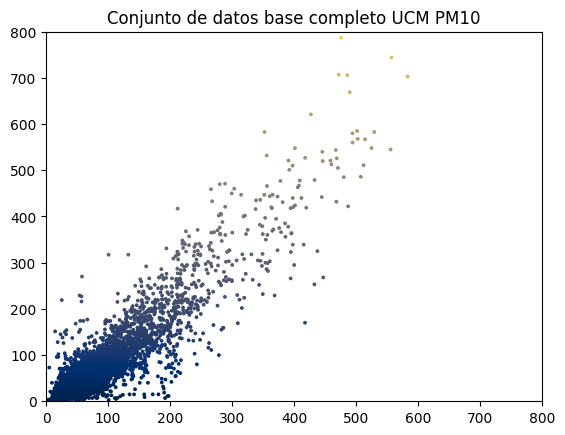

['PM10 dbUTAL', 'R2', 0.8203632440758089]
['PM10 dbUTAL', 'MSE', 1000.470026784251]
['PM10 dbUTAL', 'RMSE', 31.63020750460311]
['PM10 dbUTAL', 'MASE', 1.1446586565617947]

 ************************************* 



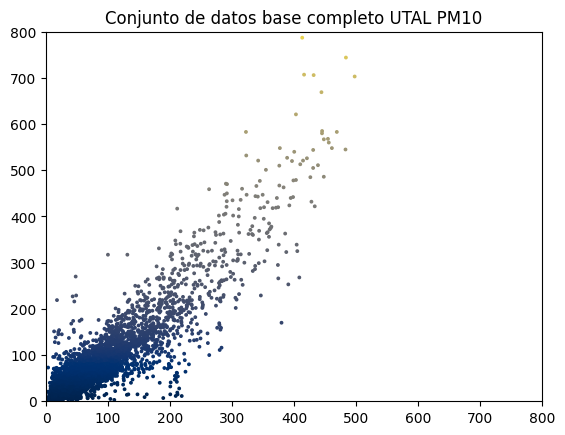

['PM10 dfLF', 'R2', 0.8138960568381721]
['PM10 dfLF', 'MSE', 1094.7253372486928]
['PM10 dfLF', 'RMSE', 33.08663381561643]
['PM10 dfLF', 'MASE', 0.9727984873313302]

 ************************************* 



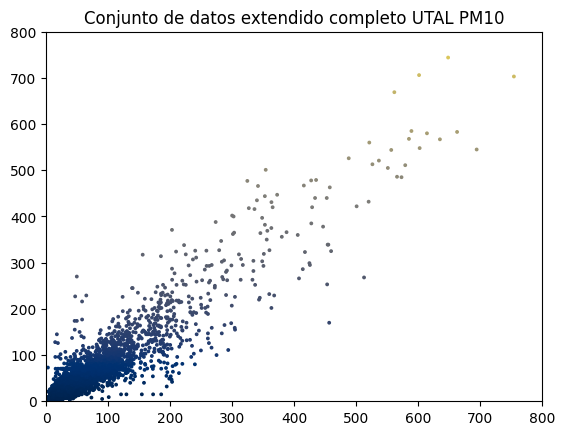

['PM10 dfUCM', 'R2', 0.7350299981038282]
['PM10 dfUCM', 'MSE', 1475.7255191468669]
['PM10 dfUCM', 'RMSE', 38.41517303288984]
['PM10 dfUCM', 'MASE', 1.3674377397793998]

 ************************************* 



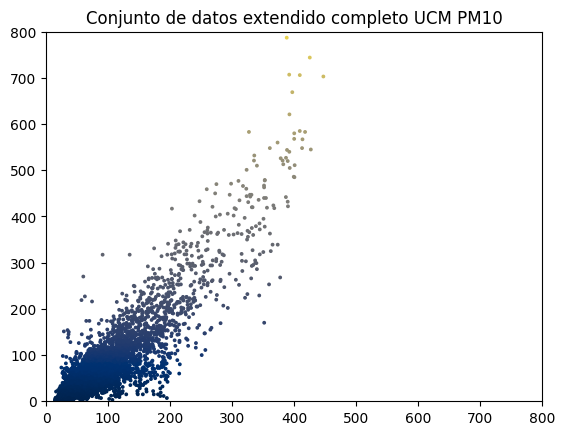

['PM10 dfUTAL', 'R2', 0.7429549550093231]
['PM10 dfUTAL', 'MSE', 1431.5882165847424]
['PM10 dfUTAL', 'RMSE', 37.83633460821413]
['PM10 dfUTAL', 'MASE', 1.3551464249489173]

 ************************************* 



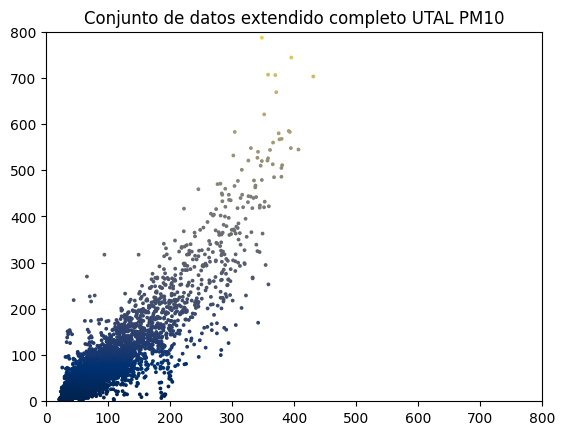

['PM10 dbaLF', 'R2', 0.8327189277814786]
['PM10 dbaLF', 'MSE', 1905.160638845302]
['PM10 dbaLF', 'RMSE', 43.64814588095698]
['PM10 dbaLF', 'MASE', 0.6366318788089617]

 ************************************* 



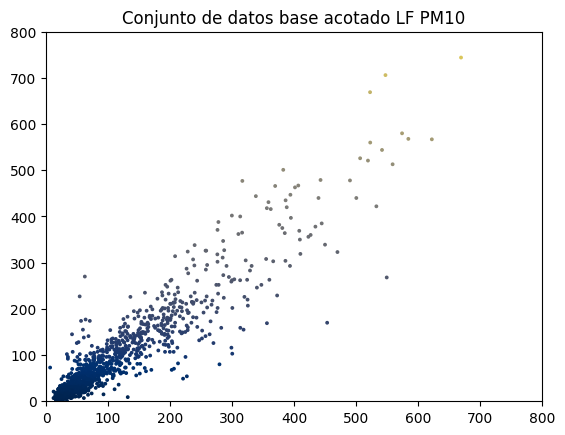

['PM10 dbaUCM', 'R2', 0.9032420178477835]
['PM10 dbaUCM', 'MSE', 334.28962970099104]
['PM10 dbaUCM', 'RMSE', 18.283589081495762]
['PM10 dbaUCM', 'MASE', 0.6440058787627222]

 ************************************* 



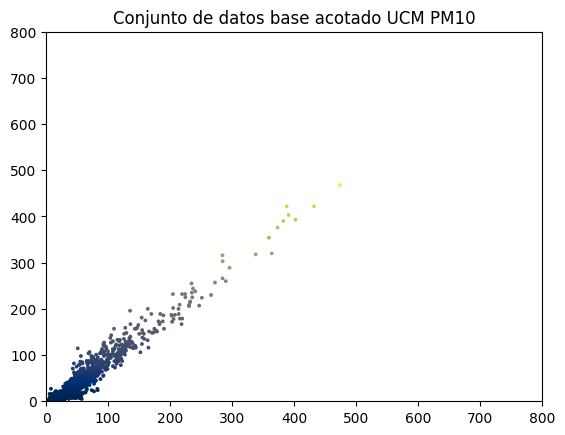

['PM10 dbaUTAL', 'R2', 0.9450470262073519]
['PM10 dbaUTAL', 'MSE', 183.7951946580445]
['PM10 dbaUTAL', 'RMSE', 13.557108639309655]
['PM10 dbaUTAL', 'MASE', 0.35120787378395174]

 ************************************* 



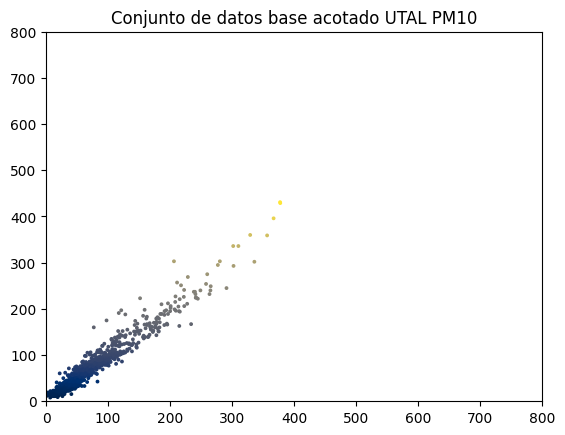

['PM10 dfaLF', 'R2', 0.8592014424869783]
['PM10 dfaLF', 'MSE', 1603.551831791196]
['PM10 dfaLF', 'RMSE', 40.04437328503464]
['PM10 dfaLF', 'MASE', 0.5615014538004552]

 ************************************* 



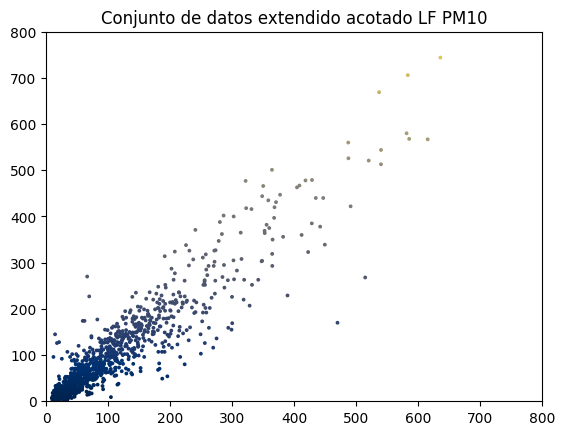

['PM10 dfaUCM', 'R2', 0.9333500042360019]
['PM10 dfaUCM', 'MSE', 230.26939905039288]
['PM10 dfaUCM', 'RMSE', 15.174630112473677]
['PM10 dfaUCM', 'MASE', 0.4897810299616312]

 ************************************* 



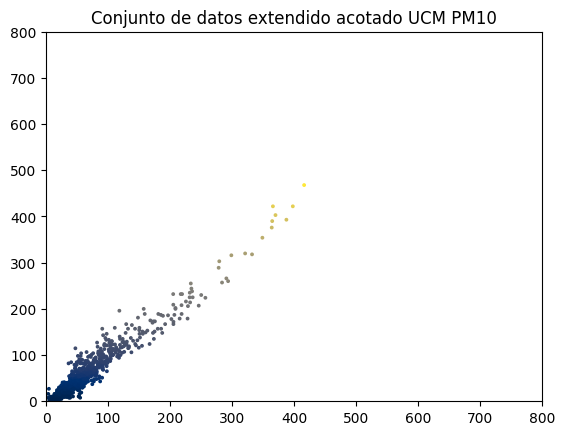

['PM10 dfaUTAL', 'R2', 0.944907280426857]
['PM10 dfaUTAL', 'MSE', 184.26258706933822]
['PM10 dfaUTAL', 'RMSE', 13.574335603238127]
['PM10 dfaUTAL', 'MASE', 0.3485301533363642]

 ************************************* 



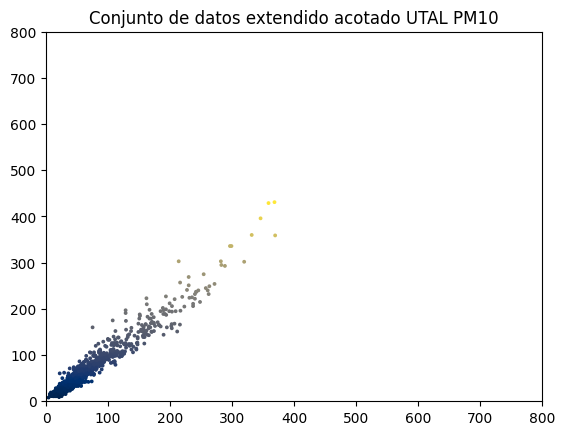

<Figure size 640x480 with 0 Axes>

In [46]:
######################### CALCULO PARA PM10 ###################################
print("\n***********************************************************")
print("**************** Analisis de test*****************")
print("***********************************************************\n")

#Atributos
data_basico = ["D_viento","H_relativa","P_atmosferica","Temperatura","V_viento","Pluviometria","PM2_5"]
data_ampliado = ["D_viento","H_relativa","P_atmosferica",
                 "Temperatura","V_viento","Pluviometria","Media_D_viento",
                 "Media_V_viento","Media_P_atmosferica","Media_Temperatura",
                 "Media_H_relativa","Minimo_Temperatura","Maximo_Temperatura",
                 "Rango_Temperatura","Media_PM10","Minimo_PM10","Maximo_PM10",
                 "Rango_PM10","PM2_5"]

#Carga del dataset completos la florida, ucm y utal, para PM10 imputado por KNN
lf=pd.read_csv('./dataset/lf_pm10_ia.csv')
ucm=pd.read_csv('./dataset/ucm_pm10_ia.csv')
utal=pd.read_csv('./dataset/utal_pm10_ia.csv')

#Carga del dataset acotados la florida, ucm y utal, para PM10 imputado por KNN
lf_acot=pd.read_csv('./dataset/lf_pm10a.csv')
ucm_acot=pd.read_csv('./dataset/ucm_pm10a.csv')
utal_acot=pd.read_csv('./dataset/utal_pm10a.csv')

#Se asignan datos superiores a 2018 para test
test_lf =  lf.loc[lf.FECHA >=180000]
test_ucm =  lf.loc[ucm.FECHA >=170000]
test_utal =  lf.loc[utal.FECHA >=170000]
#Se asignan datos superiores a 2018 para test horario acotado
test_lf_acot =  lf_acot.loc[lf_acot.FECHA >=180000]
test_ucm_acot =  ucm_acot.loc[ucm_acot.FECHA >=170000]
test_utal_acot =  utal_acot.loc[utal_acot.FECHA >=170000]

test_ucm_acot = test_ucm_acot.loc[test_ucm_acot.FECHA <=180000]
test_utal_acot = test_utal_acot.loc[test_utal_acot.FECHA <=180000]

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dbLF.pkl')
lista = df.predict(test_lf[data_basico].values)
print(["PM10 dbLF","R2",r2_score(test_lf["PM10"].values, lista)])
print(["PM10 dbLF","MSE",mean_squared_error(test_lf["PM10"].values, lista)])
#print(["PM10 dbLF","MAE",median_absolute_error(test_lf["PM10"].values, lista)])
#print(["PM10 dbLF","MaxE",max_error(test_lf["PM10"].values, lista)])
print(["PM10 dbLF","RMSE",metrics.rmse(test_lf["PM10"].values, lista)])
print(["PM10 dbLF","MASE",metrics.mase(test_lf["PM10"].values, lista)])
#print(["PM10 dbLF","MAE2",metrics.mae(test_lf["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_lf["PM10"].values,"Conjunto de datos base completo LF PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dbUCM.pkl')
lista = df.predict(test_ucm[data_basico].values)
print(["PM10 dbUCM","R2",r2_score(test_ucm["PM10"].values, lista)])
print(["PM10 dbUCM","MSE",mean_squared_error(test_ucm["PM10"].values, lista)])
#print(["PM10 dbUCM","MAE",median_absolute_error(test_ucm["PM10"].values, lista)])
#print(["PM10 dbUCM","MaxE",max_error(test_ucm["PM10"].values, lista)])
print(["PM10 dbUCM","RMSE",metrics.rmse(test_ucm["PM10"].values, lista)])
print(["PM10 dbUCM","MASE",metrics.mase(test_ucm["PM10"].values, lista)])
#print(["PM10 dbUCM","MAE2",metrics.mae(test_ucm["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_ucm["PM10"].values,"Conjunto de datos base completo UCM PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dbUTAL.pkl')
lista = df.predict(test_utal[data_basico].values)
print(["PM10 dbUTAL","R2",r2_score(test_utal["PM10"].values, lista)])
print(["PM10 dbUTAL","MSE",mean_squared_error(test_utal["PM10"].values, lista)])
#print(["PM10 dbUTAL","MAE",median_absolute_error(test_utal["PM10"].values, lista)])
#print(["PM10 dbUTAL","MaxE",max_error(test_utal["PM10"].values, lista)])
print(["PM10 dbUTAL","RMSE",metrics.rmse(test_utal["PM10"].values, lista)])
print(["PM10 dbUTAL","MASE",metrics.mase(test_utal["PM2_5"].values, lista)])
#print(["PM10 dbUTAL","MAE2",metrics.mae(test_utal["PM2_5"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_utal["PM10"].values,"Conjunto de datos base completo UTAL PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dfLF.pkl')
lista = df.predict(test_lf[data_ampliado].values)
print(["PM10 dfLF","R2",r2_score(test_lf["PM10"].values, lista)])
print(["PM10 dfLF","MSE",mean_squared_error(test_lf["PM10"].values, lista)])
#print(["PM10 dfLF","MAE",median_absolute_error(test_lf["PM10"].values, lista)])
#print(["PM10 dfLF","MaxE",max_error(test_lf["PM10"].values, lista)])
print(["PM10 dfLF","RMSE",metrics.rmse(test_lf["PM10"].values, lista)])
print(["PM10 dfLF","MASE",metrics.mase(test_lf["PM10"].values, lista)])
#print(["PM10 dfLF","MAE2",metrics.mae(test_lf["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_lf["PM10"].values,"Conjunto de datos extendido completo UTAL PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dfUCM.pkl')
lista = df.predict(test_ucm[data_ampliado].values)
print(["PM10 dfUCM","R2",r2_score(test_ucm["PM10"].values, lista)])
print(["PM10 dfUCM","MSE",mean_squared_error(test_ucm["PM10"].values, lista)])
#print(["PM10 dfUCM","MAE",median_absolute_error(test_ucm["PM10"].values, lista)])
#print(["PM10 dfUCM","MaxE",max_error(test_ucm["PM10"].values, lista)])
print(["PM10 dfUCM","RMSE",metrics.rmse(test_ucm["PM10"].values, lista)])
print(["PM10 dfUCM","MASE",metrics.mase(test_ucm["PM10"].values, lista)])
#print(["PM10 dfUCM","MAE2",metrics.mae(test_ucm["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_ucm["PM10"].values,"Conjunto de datos extendido completo UCM PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dfUTAL.pkl')
lista = df.predict(test_utal[data_ampliado].values)
print(["PM10 dfUTAL","R2",r2_score(test_utal["PM10"].values, lista)])
print(["PM10 dfUTAL","MSE",mean_squared_error(test_utal["PM10"].values, lista)])
#print(["PM10 dfUTAL","MAE",median_absolute_error(test_utal["PM10"].values, lista)])
#print(["PM10 dfUTAL","MaxE",max_error(test_utal["PM10"].values, lista)])
print(["PM10 dfUTAL","RMSE",metrics.rmse(test_utal["PM10"].values, lista)])
print(["PM10 dfUTAL","MASE",metrics.mase(test_utal["PM10"].values, lista)])
#print(["PM10 dfUTAL","MAE2",metrics.mae(test_utal["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_utal["PM10"].values,"Conjunto de datos extendido completo UTAL PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dbaLF.pkl')
lista = df.predict(test_lf_acot[data_basico].values)
print(["PM10 dbaLF","R2",r2_score(test_lf_acot["PM10"].values, lista)])
print(["PM10 dbaLF","MSE",mean_squared_error(test_lf_acot["PM10"].values, lista)])
#print(["PM10 dbaLF","MAE",median_absolute_error(test_lf_acot["PM10"].values, lista)])
#print(["PM10 dbaLF","MaxE",max_error(test_lf_acot["PM10"].values, lista)])
print(["PM10 dbaLF","RMSE",metrics.rmse(test_lf_acot["PM10"].values, lista)])
print(["PM10 dbaLF","MASE",metrics.mase(test_lf_acot["PM10"].values, lista)])
#print(["PM10 dbaLF","MAE2",metrics.mae(test_lf_acot["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_lf_acot["PM10"].values,"Conjunto de datos base acotado LF PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dbaUCM.pkl')
lista = df.predict(test_ucm_acot[data_basico].values)
print(["PM10 dbaUCM","R2",r2_score(test_ucm_acot["PM10"].values, lista)])
print(["PM10 dbaUCM","MSE",mean_squared_error(test_ucm_acot["PM10"].values, lista)])
#print(["PM10 dbaUCM","MAE",median_absolute_error(test_ucm_acot["PM10"].values, lista)])
#print(["PM10 dbaUCM","MaxE",max_error(test_ucm_acot["PM10"].values, lista)])
print(["PM10 dbaUCM","RMSE",metrics.rmse(test_ucm_acot["PM10"].values, lista)])
print(["PM10 dbaUCM","MASE",metrics.mase(test_ucm_acot["PM10"].values, lista)])
#print(["PM10 dbaUCM","MAE2",metrics.mae(test_ucm_acot["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_ucm_acot["PM10"].values,"Conjunto de datos base acotado UCM PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dbaUTAL.pkl')
lista = df.predict(test_utal_acot[data_basico].values)
print(["PM10 dbaUTAL","R2",r2_score(test_utal_acot["PM10"].values, lista)])
print(["PM10 dbaUTAL","MSE",mean_squared_error(test_utal_acot["PM10"].values, lista)])
#print(["PM10 dbaUTAL","MAE",median_absolute_error(test_utal_acot["PM10"].values, lista)])
#print(["PM10 dbaUTAL","MaxE",max_error(test_utal_acot["PM10"].values, lista)])
print(["PM10 dbaUTAL","RMSE",metrics.rmse(test_utal_acot["PM10"].values, lista)])
print(["PM10 dbaUTAL","MASE",metrics.mase(test_utal_acot["PM10"].values, lista)])
#print(["PM10 dbaUTAL","MAE2",metrics.mae(test_utal_acot["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_utal_acot["PM10"].values,"Conjunto de datos base acotado UTAL PM10")

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dfaLF.pkl')
lista = df.predict(test_lf_acot[data_ampliado].values)
print(["PM10 dfaLF","R2",r2_score(test_lf_acot["PM10"].values, lista)])
print(["PM10 dfaLF","MSE",mean_squared_error(test_lf_acot["PM10"].values, lista)])
#print(["PM10 dfaLF","MAE",median_absolute_error(test_lf_acot["PM10"].values, lista)])
#print(["PM10 dfaLF","MaxE",max_error(test_lf_acot["PM10"].values, lista)])
print(["PM10 dfaLF","RMSE",metrics.rmse(test_lf_acot["PM10"].values, lista)])
print(["PM10 dfaLF","MASE",metrics.mase(test_lf_acot["PM10"].values, lista)])
#print(["PM10 dfaLF","MAE2",metrics.mae(test_lf_acot["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_lf_acot["PM10"].values,"Conjunto de datos extendido acotado LF PM10")
pm10_lf_o=test_lf_acot["PM10"].values
pm10_lf_p=lista

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dfaUCM.pkl')
lista = df.predict(test_ucm_acot[data_ampliado].values)
print(["PM10 dfaUCM","R2",r2_score(test_ucm_acot["PM10"].values, lista)])
print(["PM10 dfaUCM","MSE",mean_squared_error(test_ucm_acot["PM10"].values, lista)])
#print(["PM10 dfaUCM","MAE",median_absolute_error(test_ucm_acot["PM10"].values, lista)])
#print(["PM10 dfaUCM","MaxE",max_error(test_ucm_acot["PM10"].values, lista)])
print(["PM10 dfaUCM","RMSE",metrics.rmse(test_ucm_acot["PM10"].values, lista)])
print(["PM10 dfaUCM","MASE",metrics.mase(test_ucm_acot["PM10"].values, lista)])
#print(["PM10 dfaUCM","MAE2",metrics.mae(test_ucm_acot["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_ucm_acot["PM10"].values,"Conjunto de datos extendido acotado UCM PM10")
pm10_ucm_o=test_ucm_acot["PM10"].values
pm10_ucm_p=lista

df = joblib.load('./'+ruta+'modelo_entrenadoPM10_dfaUTAL.pkl')
lista = df.predict(test_utal_acot[data_ampliado].values)
print(["PM10 dfaUTAL","R2",r2_score(test_utal_acot["PM10"].values, lista)])
print(["PM10 dfaUTAL","MSE",mean_squared_error(test_utal_acot["PM10"].values, lista)])
#print(["PM10 dfaUTAL","MAE",median_absolute_error(test_utal_acot["PM10"].values, lista)])
#print(["PM10 dfaUTAL","MaxE",max_error(test_utal_acot["PM10"].values, lista)])
print(["PM10 dfaUTAL","RMSE",metrics.rmse(test_utal_acot["PM10"].values, lista)])
print(["PM10 dfaUTAL","MASE",metrics.mase(test_utal_acot["PM10"].values, lista)])
#print(["PM10 dfaUTAL","MAE2",metrics.mae(test_utal_acot["PM10"].values, lista)])
print("\n ************************************* \n")
grafico(lista,test_utal_acot["PM10"].values,"Conjunto de datos extendido acotado UTAL PM10")
pm10_utal_o=test_utal_acot["PM10"].values
pm10_utal_p=lista


### Codigo para guardar los resultados obtenidos en las predicciones y hacer la comparacion con los originales

In [9]:
#Codigo para guardar los resultados obtenidos en las predicciones y hacer la comparacion con los originales

df_resultados = pd.DataFrame()

df_resultados['lf_pm10_o']= pm10_lf_o
df_resultados['lf_pm10_p']=pm10_lf_p
df_resultados['ucm_pm10_o']=pm10_ucm_o
df_resultados['ucm_pm10_p']=pm10_ucm_p
df_resultados['utal_pm10_o']=pm10_utal_o
df_resultados['utal_pm10_p']=pm10_utal_p
df_resultados['lf_pm2_5_o']= pm2_5_lf_o
df_resultados['lf_pm2_5_p']=pm2_5_lf_p
df_resultados['ucm_pm2_5_o']=pm2_5_ucm_o
df_resultados['ucm_pm2_5_p']=pm2_5_ucm_p
df_resultados['utal_pm2_5_o']=pm2_5_utal_o
df_resultados['utal_pm2_5_p']=pm2_5_utal_p

df_resultados.to_csv('resultados_originales_vs_predichos.csv')


In [11]:
df_resultados.head()

,lf_pm10_o,lf_pm10_p,ucm_pm10_o,ucm_pm10_p,utal_pm10_o,utal_pm10_p,lf_pm2_5_o,lf_pm2_5_p,ucm_pm2_5_o,ucm_pm2_5_p,utal_pm2_5_o,utal_pm2_5_p
0,28.0,33.291800,18.68,34.183544,15.57,27.656569,11.0,3.992827,1.000,8.028218,2.857,4.663183
1,42.0,43.889242,10.45,28.606679,18.51,26.789079,13.0,8.474960,1.000,1.543585,5.704,7.412280
2,32.0,45.477879,13.19,30.641888,24.22,26.705284,14.0,6.524586,1.000,2.232241,2.857,11.268453
3,32.0,35.619680,10.45,31.864760,40.70,33.140864,15.0,11.047609,1.000,2.380818,8.530,21.128803
4,30.0,32.712602,21.42,33.162982,68.77,44.382419,9.0,9.303199,4.166,7.464001,20.040,34.219669


In [42]:
# Codigo para la clasificacion de valores del aire
#*************** MP10 ****************#

def conteo (predicho, original ,titulo):
    
    bueno_p = 0                              
    regular_p = 0
    alerta_p = 0
    pre_emergencia_p = 0
    emergencia_p = 0

    bueno_o = 0                              
    regular_o = 0
    alerta_o = 0
    pre_emergencia_o = 0
    emergencia_o = 0

    b,r,a,p,e = 0,0,0,0,0



    e_b,e_r,e_a,e_p = 0,0,0,0
    p_b,p_r,p_a,p_e = 0,0,0,0
    a_b,a_r,a_p,a_e = 0,0,0,0
    r_b,r_a,r_p,r_e = 0,0,0,0
    b_r,b_a,b_p,b_e = 0,0,0,0

    
    for pred, orig in zip(predicho, original):

        if orig>=0 and orig<=149:
            bueno_o = bueno_o+1
            b=1
            r, a, p, e = 0,0,0,0

        elif orig>=150 and orig<=194:
            regular_o = regular_o+1
            r=1
            b, a, p, e = 0,0,0,0

        elif orig>=195 and orig<=239:
            alerta_o = alerta_o+1
            a=1
            b, r, p, e = 0,0,0,0

        elif orig>=240 and orig<=329:
            pre_emergencia_o = pre_emergencia_o+1
            p=1
            b, r, a, e = 0,0,0,0

        else:
            emergencia_o = emergencia_o+1
            e=1
            b, r, a, p = 0,0,0,0

        ####### predichos #######

        if pred>=0 and pred<=149:
            if b==1:
                bueno_p = bueno_p+1
            if r==1:
                b_r = b_r+1
            if a==1:
                b_a = b_a+1
            if p==1:
                b_p = b_p+1
            if e==1:
                b_e = b_e+1

        elif pred>=150 and pred<=194:

            if b==1:
                r_b = r_b+1

            if r==1:
                regular_p = regular_p+1
            if a==1:
                r_a = r_a+1
            if p==1:
                r_p = r_p+1
            if e==1:
                r_e = r_e+1

        elif pred>=195 and pred<=239:

            if b==1:
                a_b = a_b+1
            if r==1:
                a_r = a_r+1
            if a==1:
                alerta_p = alerta_p+1
            if p==1:
                a_p = a_p+1
            if e==1:
                a_e = a_e+1

        elif pred>=240 and pred<=329:

            if b==1:
                p_b = p_b+1
            if r==1:
                p_r = p_r+1
            if a==1:
                p_a = p_a+1
            if p==1:
                pre_emergencia_p = pre_emergencia_p+1
            if e==1:
                p_e = p_e+1

        else:

            if b==1:
                e_b = e_b+1
            if r==1:
                e_r = e_r+1
            if a==1:
                e_a = e_a+1
            if p==1:
                e_p = e_p+1
            if e==1:
                emergencia_p = emergencia_p+1
                
    
    print("\n ******* conteo de total de datos originales de la estacion ", titulo, "MP10 ******* \n")
                
    print('\n buenos correctamente clasificados:',bueno_o)
    print('\n regular correctamente clasificados:',regular_o)
    print('\n alerta correctamente clasificados:',alerta_o)
    print('\n pre-emergencia correctamente clasificados:',pre_emergencia_o)
    print('\n emergencia correctamente clasificados:',emergencia_o)
                
    print("\n ******* Resultados de las predicciones de la estacion ", titulo, "MP10 ******* \n")

    print ('\n',e_b,e_r,e_a,e_p)
    print ('\n',p_b,p_r,p_a,p_e)
    print ('\n',a_b,a_r,a_p,a_e)
    print ('\n',r_b,r_a,r_p,r_e)
    print ('\n',b_r,b_a,b_p,b_e)

    print('\n buenos correctamente clasificados:',bueno_p)
    print('\n regular correctamente clasificados:',regular_p)
    print('\n alerta correctamente clasificados:',alerta_p)
    print('\n pre-emergencia correctamente clasificados:',pre_emergencia_p)
    print('\n emergencia correctamente clasificados:',emergencia_p)

    
conteo(df_resultados['lf_pm10_p'], df_resultados['lf_pm10_o'], 'La florida')
conteo(df_resultados['ucm_pm10_p'], df_resultados['ucm_pm10_o'], 'UCM')
conteo(df_resultados['utal_pm10_p'], df_resultados['utal_pm10_o'], 'UTAL')




 ******* conteo de total de datos originales de la estacion  La florida MP10 ******* 


 buenos correctamente clasificados: 833

 regular correctamente clasificados: 88

 alerta correctamente clasificados: 58

 pre-emergencia correctamente clasificados: 44

 emergencia correctamente clasificados: 48

 ******* Resultados de las predicciones de la estacion  La florida MP10 ******* 


 4 6 1 8

 5 8 9 9

 12 10 8 1

 24 21 4 0

 30 6 1 0

 buenos correctamente clasificados: 788

 regular correctamente clasificados: 34

 alerta correctamente clasificados: 21

 pre-emergencia correctamente clasificados: 23

 emergencia correctamente clasificados: 38

 ******* conteo de total de datos originales de la estacion  UCM MP10 ******* 


 buenos correctamente clasificados: 1003

 regular correctamente clasificados: 31

 alerta correctamente clasificados: 19

 pre-emergencia correctamente clasificados: 10

 emergencia correctamente clasificados: 8

 ******* Resultados de las predicciones de la esta

In [41]:
#***************************** MP2.5 *****************************************#
def conteo (predicho, original ,titulo):

    bueno_o = 0                              
    regular_o = 0
    alerta_o = 0
    pre_emergencia_o = 0
    emergencia_o = 0

    bueno_p = 0                              
    regular_p = 0
    alerta_p = 0
    pre_emergencia_p = 0
    emergencia_p = 0

    b,r,a,p,e = 0,0,0,0,0

    e_b,e_r,e_a,e_p = 0,0,0,0
    p_b,p_r,p_a,p_e = 0,0,0,0
    a_b,a_r,a_p,a_e = 0,0,0,0
    r_b,r_a,r_p,r_e = 0,0,0,0
    b_r,b_a,b_p,b_e = 0,0,0,0

    for l, t in zip(predicho, original):

        if l>=0 and l<=49:
            bueno_o = bueno_o+1
            b=1
            r, a, p, e = 0,0,0,0
            #print ("b:",b)

        elif l>=50 and l<=79:
            regular_o = regular_o+1
            r=1
            b, a, p, e = 0,0,0,0
            #print("r:",r)

        elif l>=80 and l<=109:
            alerta_o = alerta_o+1
            a=1
            b, r, p, e = 0,0,0,0
            #print("a:",a)

        elif l>=110 and l<=169:
            pre_emergencia_o = pre_emergencia_o+1
            p=1
            b, r, a, e = 0,0,0,0
            #print("p:",p)

        else:
            emergencia_o = emergencia_o+1
            e=1
            b, r, a, p = 0,0,0,0
            #print("e:",e)

        #######   Test #######

        if t>=0 and t<=49:
            if b==1:
                bueno_p = bueno_p+1
            if r==1:
                b_r = b_r+1
                #regular_t = regular_t+1
            if a==1:
                b_a = b_a+1
                #alerta_t = alerta_t+1
            if p==1:
                b_p = b_p+1
                #pre_emergencia_t = pre_emergencia_t+1
            if e==1:
                b_e = b_e+1
                #emergencia_t = emergencia_t+1

        elif t>=50 and t<=79:

            if b==1:
                r_b = r_b+1
                #bueno_t = bueno_t+1
            if r==1:
                regular_p = regular_p+1
            if a==1:
                r_a = r_a+1
                #alerta_t = alerta_t+1
            if p==1:
                r_p = r_p+1
                #pre_emergencia_t = pre_emergencia_t+1
            if e==1:
                r_e = r_e+1
                #emergencia_t = emergencia_t+1

        elif t>=80 and t<=109:

            if b==1:
                a_b = a_b+1
                #bueno_t = bueno_t+1
            if r==1:
                a_r = a_r+1
                #regular_t = regular_t+1
            if a==1:
                alerta_p = alerta_p+1
            if p==1:
                a_p = a_p+1
                #pre_emergencia_t = pre_emergencia_t+1
            if e==1:
                a_e = a_e+1
                #emergencia_t = emergencia_t+1

        elif t>=110 and t<=169:

            if b==1:
                p_b = p_b+1
                #bueno_t = bueno_t+1
            if r==1:
                p_r = p_r+1
                #regular_t = regular_t+1
            if a==1:
                p_a = p_a+1
                #alerta_t = alerta_t+1
            if p==1:
                pre_emergencia_p = pre_emergencia_p+1
            if e==1:
                p_e = p_e+1
                #emergencia_t = emergencia_t+1

        else:

            if b==1:
                e_b = e_b+1
                #bueno_t = bueno_t+1
            if r==1:
                e_r = e_r+1
                #regular_t = regular_t+1
            if a==1:
                e_a = e_a+1
                #alerta_t = alerta_t+1
            if p==1:
                e_p = e_p+1
                #pre_emergencia_t = pre_emergencia_t+1
            if e==1:
                emergencia_p = emergencia_p+1
    
    print("\n ******* conteo de total de datos originales de la estacion ", titulo, "MP2.5 ******* \n")
                
    print('\n buenos correctamente clasificados:',bueno_o)
    print('\n regular correctamente clasificados:',regular_o)
    print('\n alerta correctamente clasificados:',alerta_o)
    print('\n pre-emergencia correctamente clasificados:',pre_emergencia_o)
    print('\n emergencia correctamente clasificados:',emergencia_o)


    print("\n ******* Resultados de las predicciones de la estacion ", titulo, "MP2.5 ******* \n")

    print ('\n',e_b,e_r,e_a,e_p)
    print ('\n',p_b,p_r,p_a,p_e)
    print ('\n',a_b,a_r,a_p,a_e)
    print ('\n',r_b,r_a,r_p,r_e)
    print ('\n',b_r,b_a,b_p,b_e)

    print('\n buenos correctamente clasificados:',bueno_p)
    print('\n regular correctamente clasificados:',regular_p)
    print('\n alerta correctamente clasificados:',alerta_p)
    print('\n pre-emergencia correctamente clasificados:',pre_emergencia_p)
    print('\n emergencia correctamente clasificados:',emergencia_p)


conteo(df_resultados['lf_pm2_5_p'], df_resultados['lf_pm2_5_o'], 'La florida')
conteo(df_resultados['ucm_pm2_5_p'], df_resultados['ucm_pm2_5_o'], 'UCM')
conteo(df_resultados['utal_pm2_5_p'], df_resultados['utal_pm2_5_o'], 'UTAL')


 ******* conteo de total de datos originales de la estacion  La florida MP2.5 ******* 


 buenos correctamente clasificados: 543

 regular correctamente clasificados: 158

 alerta correctamente clasificados: 110

 pre-emergencia correctamente clasificados: 138

 emergencia correctamente clasificados: 122

 ******* Resultados de las predicciones de la estacion  La florida MP2.5 ******* 


 0 4 6 34

 1 7 38 11

 2 43 18 3

 53 20 1 8

 25 6 5 8

 buenos correctamente clasificados: 487

 regular correctamente clasificados: 79

 alerta correctamente clasificados: 40

 pre-emergencia correctamente clasificados: 80

 emergencia correctamente clasificados: 92

 ******* conteo de total de datos originales de la estacion  UCM MP2.5 ******* 


 buenos correctamente clasificados: 822

 regular correctamente clasificados: 111

 alerta correctamente clasificados: 61

 pre-emergencia correctamente clasificados: 38

 emergencia correctamente clasificados: 39

 ******* Resultados de las predicciones